In [1]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep

hep.style.use('ATLAS')

In [2]:
bins_pT = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 2])
bins_pz = np.array([0.3, 0.5, 0.62, 0.75, 0.88, 1.0, 1.2, 1.5,
                    2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 17.0,
                    20.0, 24.0, 28.0, 34.0, 40.0, 48.0, 56.0,
                    68.0, 80.0])

In [3]:
evnpath = "/exp/nova/app/users/wmu/ldmcode/bdnmc_events/"
files = [f for f in os.listdir(evnpath)]
num_chi = len(files)
print('Process '+str(num_chi)+' masses')

Process 19 masses


In [4]:
pT_arr = []
pz_arr = []

for i,f in enumerate(files):
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
        if dm_mass > 40:
            continue
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("pion"):
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]

                    pT_arr.append(pT)
                    pz_arr.append(pz)

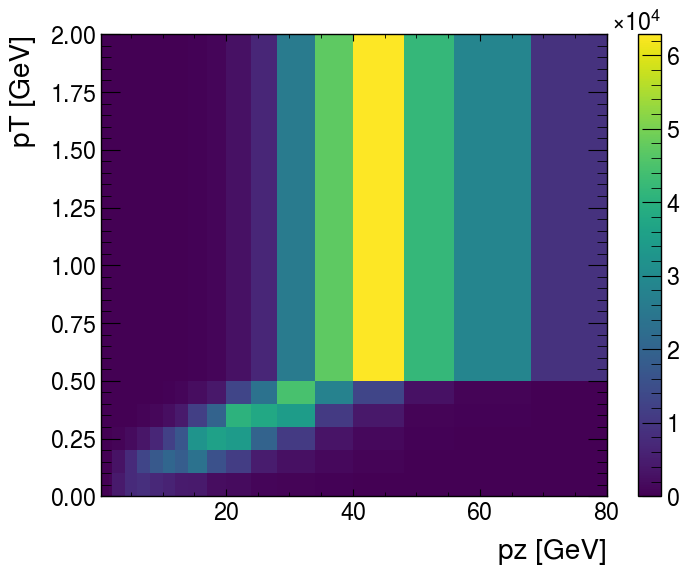

In [5]:
hist = np.histogram2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT])
#print(hist[0])

fig, ax = plt.subplots()
h = ax.hist2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT])
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
#ax.set_xscale('log')
fig.colorbar(h[3], ax=ax)

fig.show()

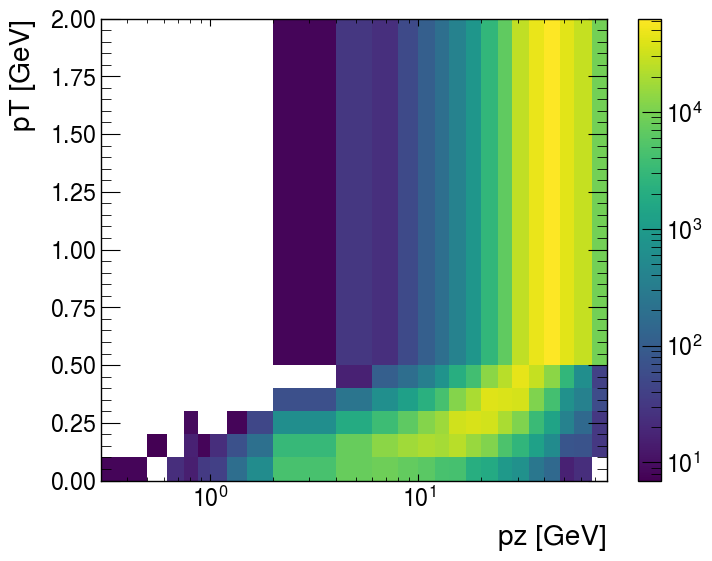

In [6]:
fig, ax = plt.subplots()
h = ax.hist2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT], norm=mpl.colors.LogNorm())
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
ax.set_xscale('log')

fig.colorbar(h[3], ax=ax)

fig.show()

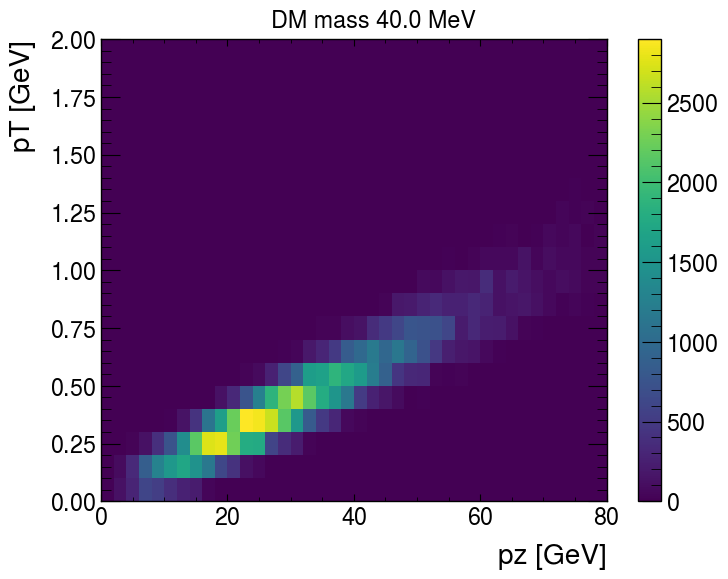

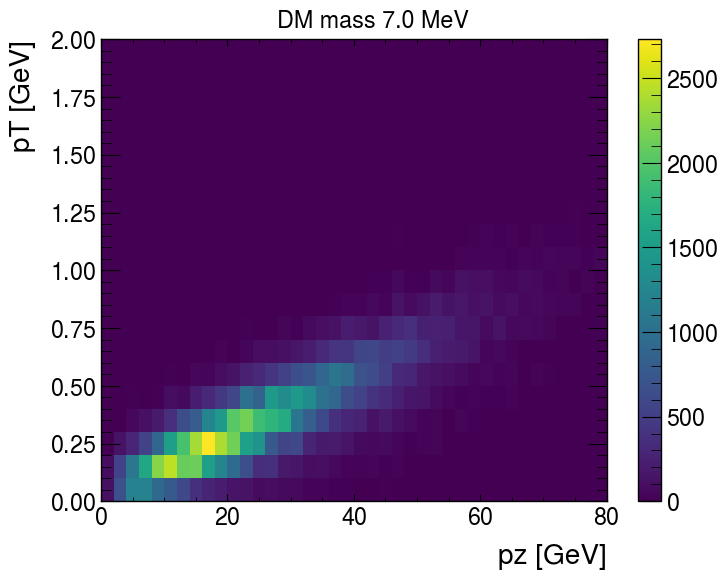

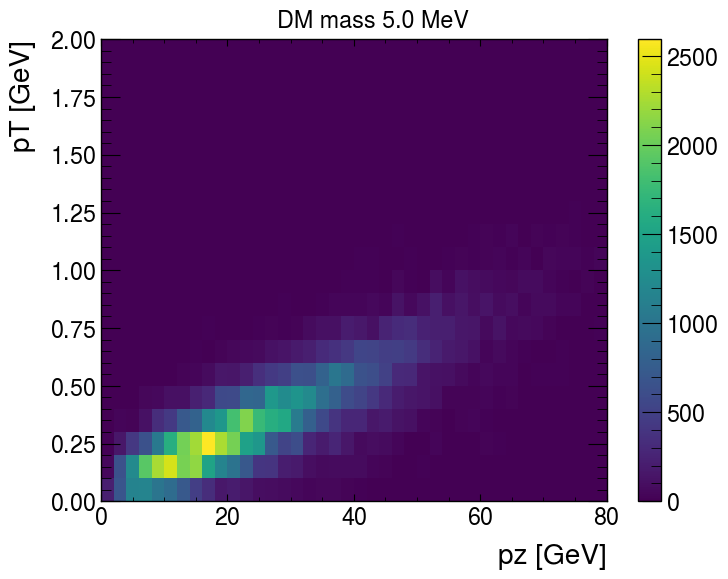

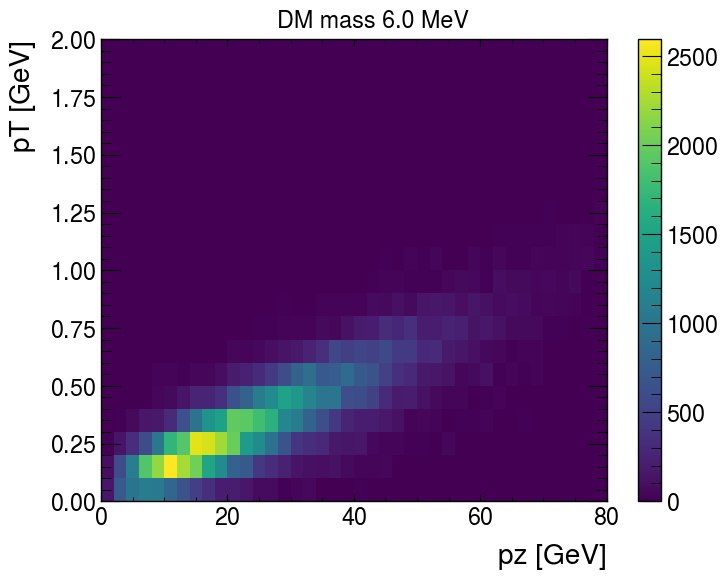

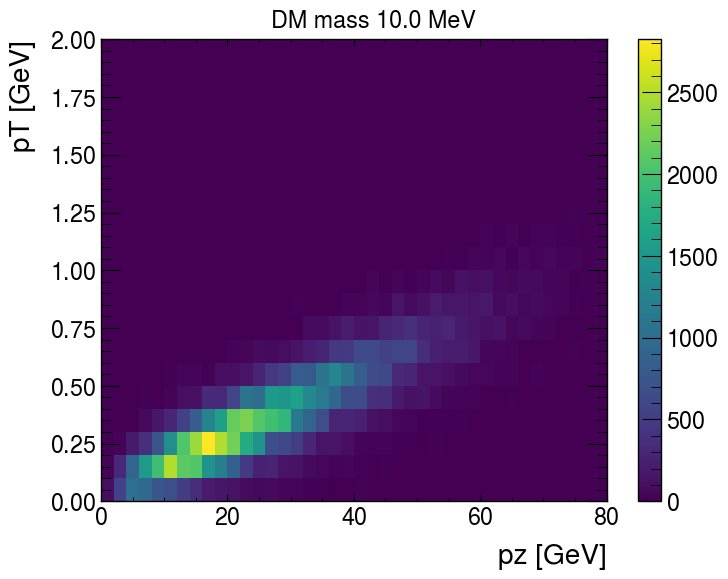

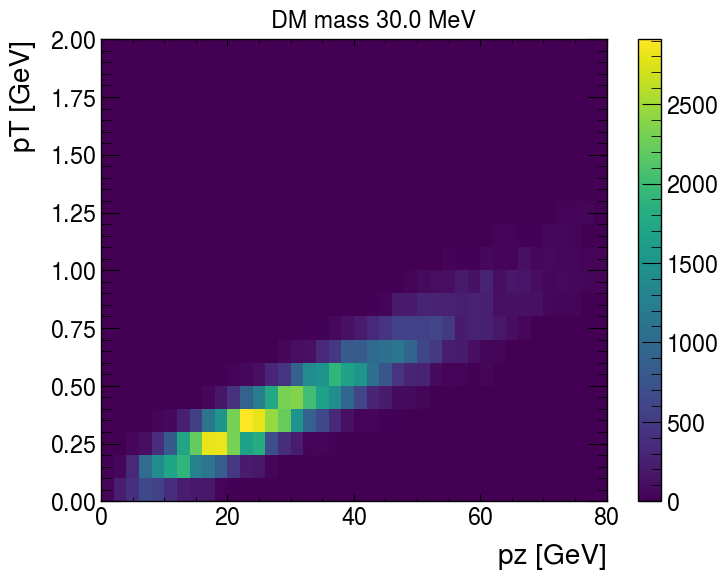

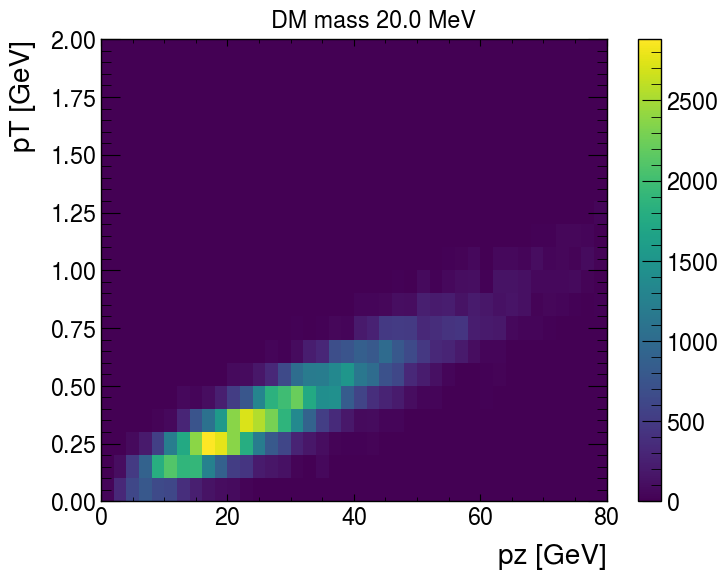

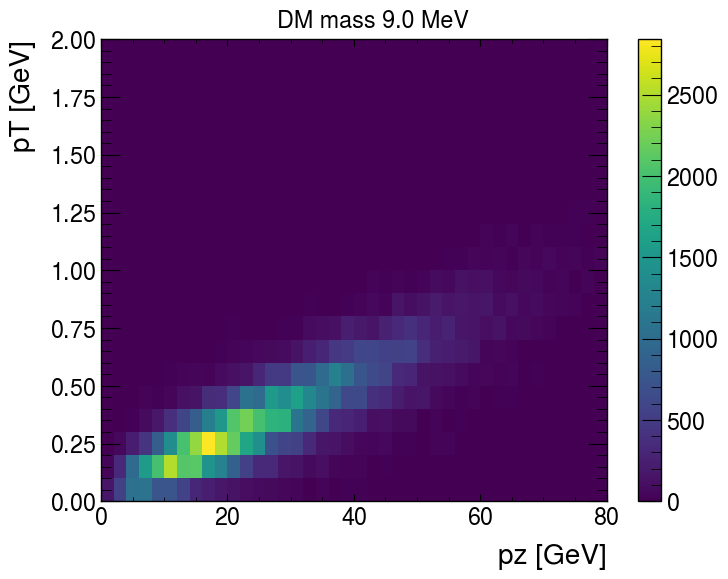

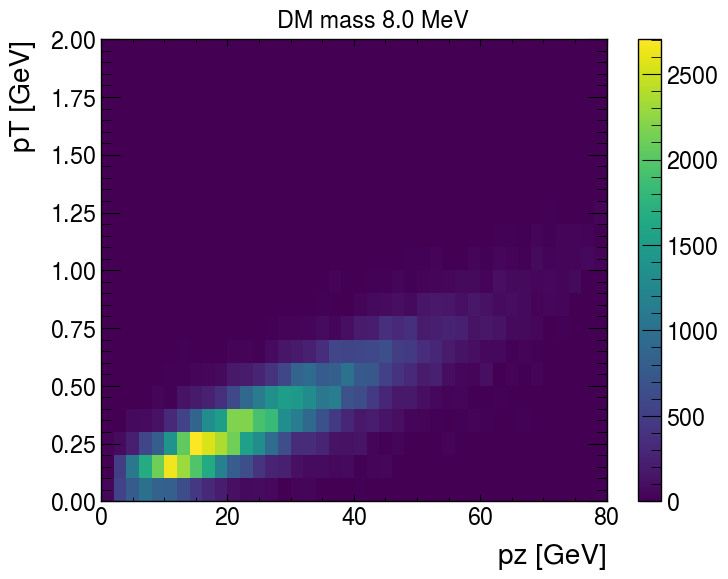

In [7]:
for i,f in enumerate(files):
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
        if dm_mass > 40:
            continue
        
        pT_arr_m = []
        pz_arr_m = []
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("pion"):
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]

                    pT_arr_m.append(pT)
                    pz_arr_m.append(pz)
        #hist = np.histogram2d(pz_arr_m, pT_arr_m, bins=[bins_pz, bins_pT])
        #for i in range(len(hist[0])):
        #    print(max(hist[0][i]))
        fig, ax = plt.subplots()
        h = ax.hist2d(pz_arr_m, pT_arr_m, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
        ax.set_xlabel('pz [GeV]')
        ax.set_ylabel('pT [GeV]')
        fig.colorbar(h[3], ax=ax)
        fig.suptitle('DM mass {0} MeV'.format(dm_mass))

        fig.show()

In [8]:
bdnmc_hist, xedges, yedges = np.histogram2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT])

MIPP_piplus = np.array([[3.31E-1, 3.25E-1, 1.93E-1, 1.06E-1, 0.0, 0.0],
               [9.2e-2, 1.37e-1, 9.03e-2, 4.92E-2, 1.42E-2, 0.0],
               [6.02E-2, 1.11E-1, 8.26E-2, 4.32E-2, 2.19E-2, 0.0],
               [4.27E-2, 9.19E-2, 7.46E-2, 4.21E-2, 2.16E-2, 0.0],
               [3.42E-2, 7.5E-2, 6.68E-2, 3.82E-2, 1.99E-2, 0.0],
               [3.91E-2, 9.98E-2, 9.27E-2, 5.2E-2, 2.85E-2, 0.0],
               [4.23E-2, 9.12E-2, 1.01E-1, 7.65E-2, 4.76E-2, 0.0],
               [4.01E-2, 8.8E-2, 1.26E-1, 9.94E-2, 6.99E-2, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], # pz = 2-4 GeV
               [1.54E-2, 5.12E-2, 6.47E-2, 6.79E-2, 0.0, 0.0],
               [7.94E-3, 2.69E-2, 3.93E-2, 4.01E-2, 3.11E-2, 0.0],
               [3.99E-3, 1.39E-2, 2.32E-2, 2.46E-2, 2.14E-2, 5.8E-2],
               [2.35E-2, 8.25E-3, 1.5E-2, 1.66E-2, 1.45E-2, 3.78E-2],
               [1.62E-3, 5.84E-3, 1.01E-2, 1.12E-2, 1.01E-2, 2.79E-2],
               [1.78E-3, 5.51E-3, 9.61E-3, 1.19E-2, 1.08E-2, 3.02E-2],
               [1.01E-3, 3.39E-3, 5.73E-3, 7.56E-3, 7.07E-3, 2.2E-2],
               [9.77E-4, 2.84E-3, 4.82E-3, 6.28E-3, 6.53E-3, 2.01E-2],
               [6.89E-4, 1.7E-3, 2.75E-3, 3.57E-3, 3.96E-3, 1.45E-2],
               [5.65E-4, 1.81E-3, 2.5E-3, 3.24E-3, 3.36E-3, 1.34E-2],
               [4.64E-4, 1.18E-3, 1.62E-3, 1.83E-3, 2.05E-3, 8.81E-3],
               [3.98E-4, 7.99E-4, 1.15E-3, 1.33E-3, 1.54E-3, 7.02E-3],
               [1.87E-4, 4.48E-4, 7.06E-4, 7.71E-4, 7.46E-4, 3.88E-3],
               [1.9E-4, 4.24E-4, 5.8E-4, 6.27E-4, 4.84E-4, 2.81E-3],
               [0.0, 0.0, 2.36E-4, 1.88E-4, 1.88E-4, 9.29E-4]])

MIPP_piminus = np.array([[2.76E-1, 3.56E-1, 1.91E-1, 9.49E-2, 0.0, 0.0],
                [7.54E-2, 1.44E-1, 9.24E-2, 4.63E-2, 2.23E-2, 0.0],
                [5.14E-2, 1.13E-1, 8.14E-2, 4.33E-2, 2.22E-2, 0.0],
                [3.9E-2, 9.04E-2, 7.11E-2, 4.03E-2, 2.09E-2, 0.0],
                [3.23E-2, 7.25E-2, 6.19E-2, 3.61E-2, 1.93E-2, 0.0],
                [3.65E-2, 9.09E-2, 8.22E-2, 5.25E-2, 3.01E-2, 0.0],
                [3.72E-2, 8.83E-2, 9.32E-2, 6.58E-2, 3.87E-2, 0.0],
                [3.2E-2, 8.2E-2, 1.08E-1, 8.3E-2, 5.61E-2, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [1.74E-2, 4.82E-2, 5.64E-2, 5.79E-2, 0.0, 0.0],
                [8.64E-3, 2.6E-2, 3.47E-2, 3.26E-2, 2.53E-2, 0.0],
                [4.46E-3, 1.2E-2, 1.9E-2, 2.09E-2, 1.72E-2, 4.86E-2],
                [2.63E-2, 8.44E-3, 1.27E-2, 1.4E-2, 1.21E-2, 3.1E-2],
                [1.68E-3, 5.1E-3, 7.65E-3, 9.51E-3, 8.74E-3, 2.21E-2],
                [1.61E-3, 4.73E-3, 7.06E-3, 8.99E-3, 8.2E-3, 2.54E-2],
                [9.19E-4, 2.61E-3, 3.98E-3, 5.11E-3, 5.59E-3, 1.68E-2],
                [6.4E-4, 2.04E-3, 2.91E-3, 4.04E-3, 4.18E-3, 1.51E-2],
                [4.61E-4, 1.14E-3, 1.48E-3, 2.17E-3, 2.5E-3, 1.04E-2],
                [3.88E-4, 8.67E-4, 1.2E-3, 1.62E-3, 2.11E-3, 8.83E-3],
                [2.63E-4, 5.55E-4, 7.23E-4, 8.38E-4, 1.09E-3, 5.25E-3],
                [1.38E-4, 2.92E-4, 4.77E-4, 5.04E-4, 6.55E-4, 3.58E-3],
                [0.0, 1.55E-4, 2.15E-4, 2.19E-4, 3.05E-4, 1.8E-3],
                [0.0, 8.79E-5, 1.71E-4, 1.52E-4, 1.57E-4, 1.03E-3],
                [0.0, 0.0, 0.0, 0.0, 0.0, 3.33E-4]])

In [9]:
MIPP_AVG = np.zeros_like(MIPP_piplus)
for i in range(len(MIPP_piplus)):
    for j in range(len(MIPP_piplus[i])):
        MIPP_AVG[i][j] = (MIPP_piplus[i][j] + MIPP_piminus[i][j])/2
print(np.sum(MIPP_piplus))
print(np.sum(MIPP_piminus))
print(np.sum(MIPP_AVG))
print(np.sum(bdnmc_hist))

4.181476
3.8305849
4.00603045
897066.0


In [10]:
print(MIPP_AVG)

[[3.0350e-01 3.4050e-01 1.9200e-01 1.0045e-01 0.0000e+00 0.0000e+00]
 [8.3700e-02 1.4050e-01 9.1350e-02 4.7750e-02 1.8250e-02 0.0000e+00]
 [5.5800e-02 1.1200e-01 8.2000e-02 4.3250e-02 2.2050e-02 0.0000e+00]
 [4.0850e-02 9.1150e-02 7.2850e-02 4.1200e-02 2.1250e-02 0.0000e+00]
 [3.3250e-02 7.3750e-02 6.4350e-02 3.7150e-02 1.9600e-02 0.0000e+00]
 [3.7800e-02 9.5350e-02 8.7450e-02 5.2250e-02 2.9300e-02 0.0000e+00]
 [3.9750e-02 8.9750e-02 9.7100e-02 7.1150e-02 4.3150e-02 0.0000e+00]
 [3.6050e-02 8.5000e-02 1.1700e-01 9.1200e-02 6.3000e-02 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.6400e-02 4.9700e-02 6.0550e-02 6.2900e-02 0.0000e+00 0.0000e+00]
 [8.2900e-03 2.6450e-02 3.7000e-02 3.6350e-02 2.8200e-02 0.0000e+00]
 [4.2250e-03 1.2950e-02 2.1100e-02 2.2750e-02 1.9300e-02 5.3300e-02]
 [2.4900e-02 8.3450e-03 1.3850e-02 1.5300e-02 1.3300e-02 3.4400e-02]
 [1.6500e-03 5.4700e-03 8.8750e-03 1.0355e-02 9.4200e-03 2.5000e-02]
 [1.6950e-03 5.1200e-03 8.3350e-03

In [11]:
hist_norm = hist[0]/np.sum(hist[0])

correction = 0

for i in range(len(MIPP_AVG)):
    for j in range(len(MIPP_AVG[i])):
        correction += hist_norm[i][j]*MIPP_AVG[i][j]
print(correction)

0.006387992774054525


/tmp/ipykernel_53580/3340862750.py:5: RuntimeWarning: divide by zero encountered in log
  ax.pcolormesh(X, Y, np.log(MIPP_AVG_T))


Text(0.5, 0.98, 'MIPP data')

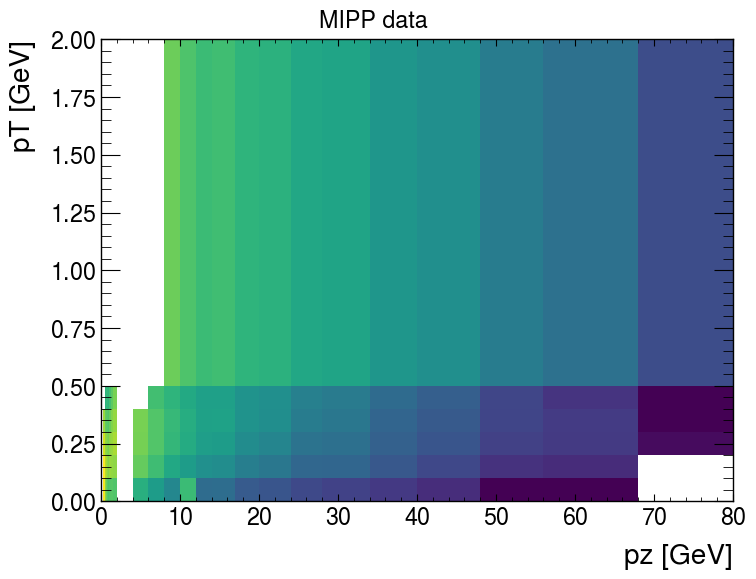

In [12]:
MIPP_AVG_T = MIPP_AVG.T
fig = plt.figure()#figsize=(7, 3))
ax = fig.add_subplot()
X, Y = np.meshgrid(bins_pz, bins_pT)
ax.pcolormesh(X, Y, np.log(MIPP_AVG_T))
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.suptitle('MIPP data')

In [13]:
evnpath = "/exp/nova/app/users/thoroho/bdnmc/eve/"
files = [f for f in os.listdir(evnpath)]
num_chi = len(files)
print('Process '+str(num_chi)+' masses')

pT_arr_full = []
pz_arr_full = []

for i,f in enumerate(files):
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events_')[1]).split('.dat')[0])
        if dm_mass != 1:
            continue
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("pion"):
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]

                    pT_arr_full.append(pT)
                    pz_arr_full.append(pz)

Process 4 masses


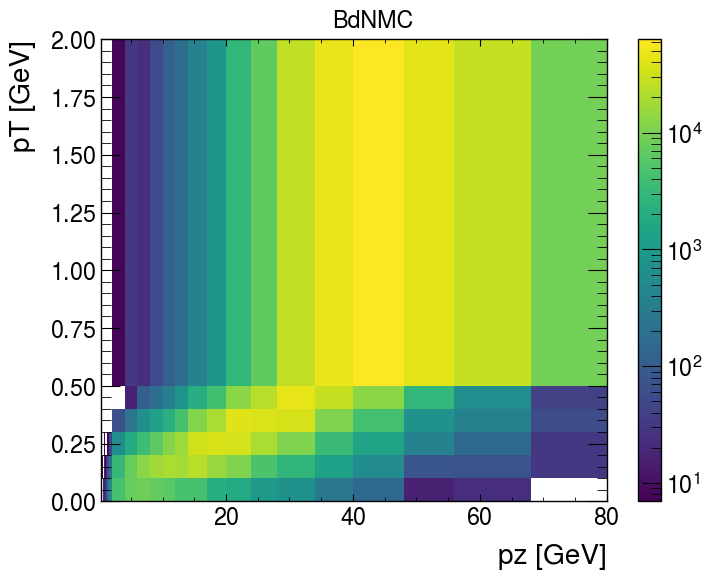

In [14]:
fig, ax = plt.subplots()
h = ax.hist2d(pz_arr, pT_arr, bins=[bins_pz, bins_pT], norm=mpl.colors.LogNorm())
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
#ax.set_xscale('log')
fig.suptitle('BdNMC')

fig.colorbar(h[3], ax=ax)

fig.show()

In [15]:
def binvals(bins):
    vals = []
    for i in range(len(bins)-1):
        vals.append((bins[i] + bins[i+1])/2)
    return vals
def normalize(weights, bins):
    width = 1000000
    weights_norm = []
    for i in range(len(bins)-1):
        thiswidth = bins[i+1] - bins[i]
        if thiswidth < width:
            width = thiswidth
    for i in range(len(bins)-1):
        weights_norm.append(weights[i]*width/(bins[i+1] - bins[i]))
    return weights_norm

/tmp/ipykernel_53580/2151031651.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


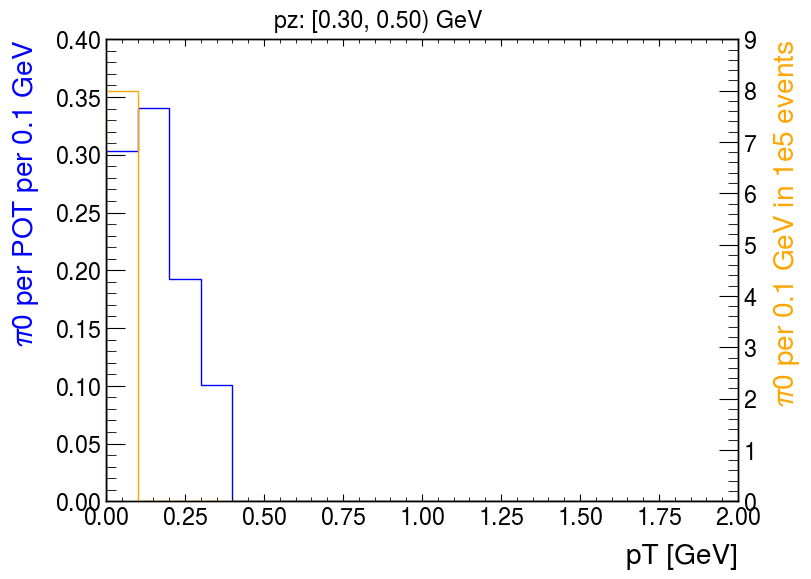

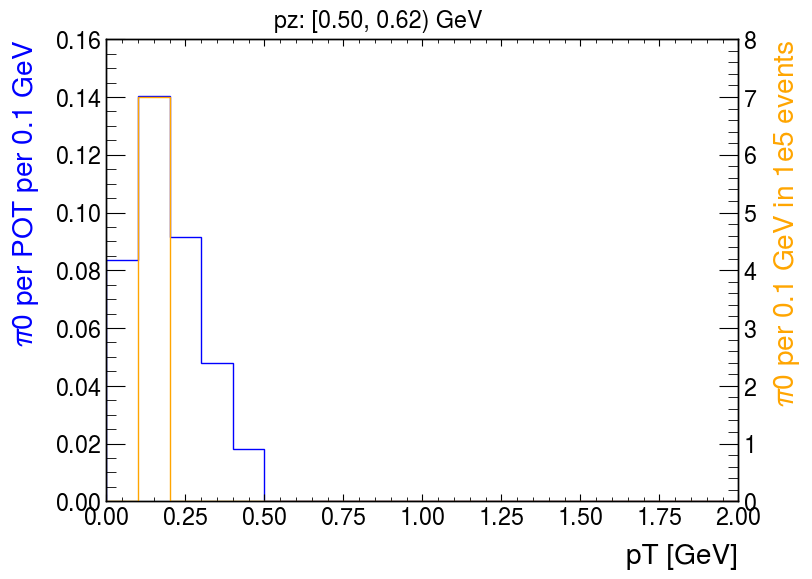

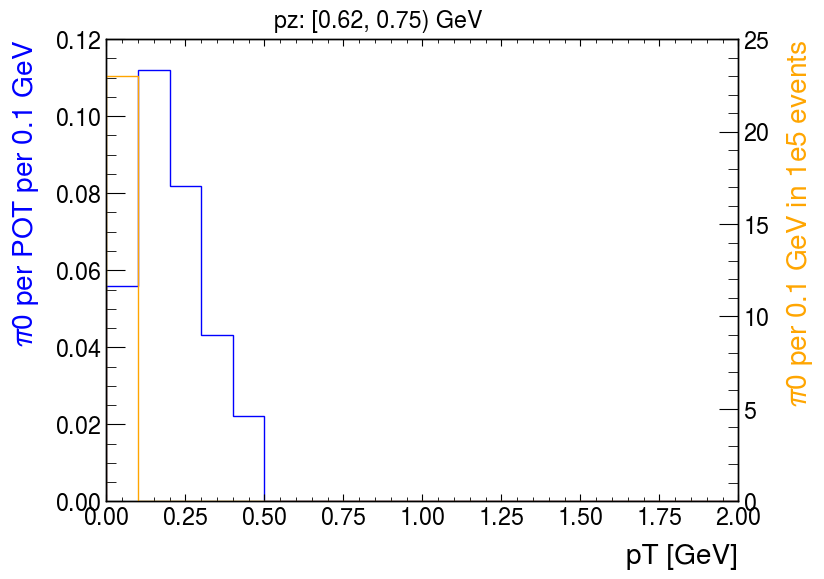

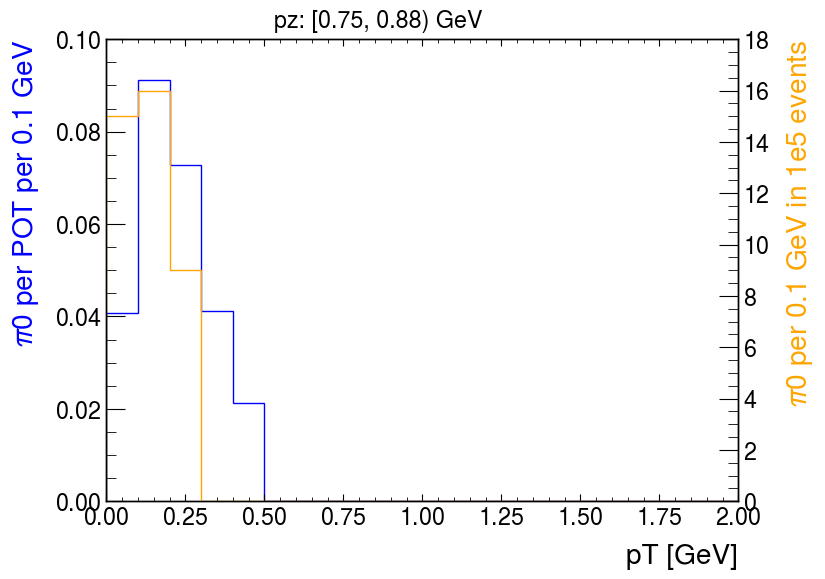

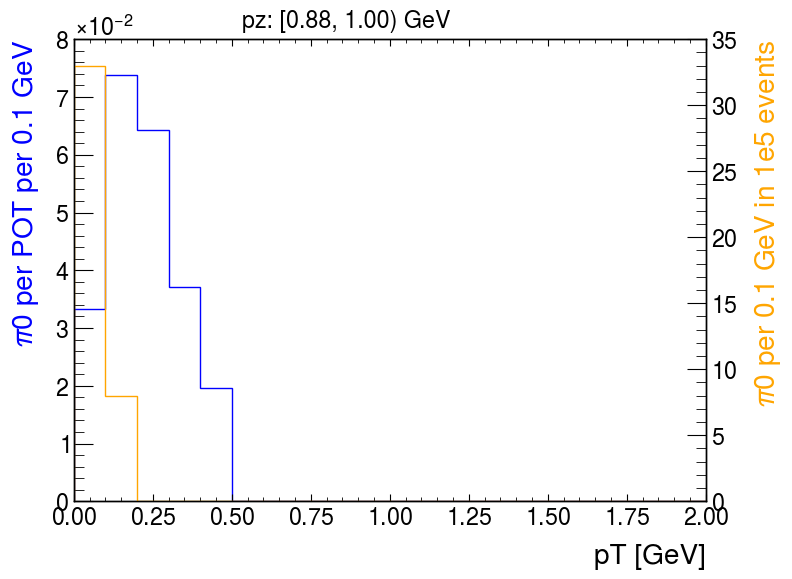

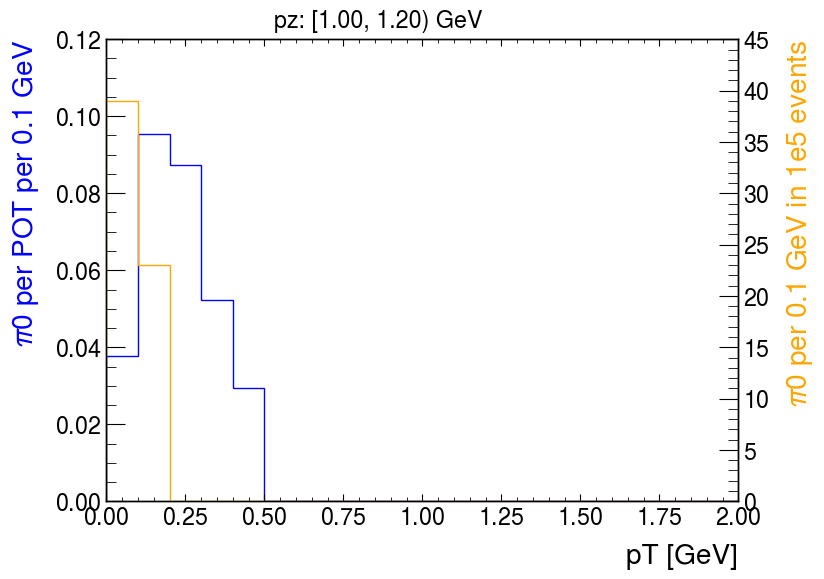

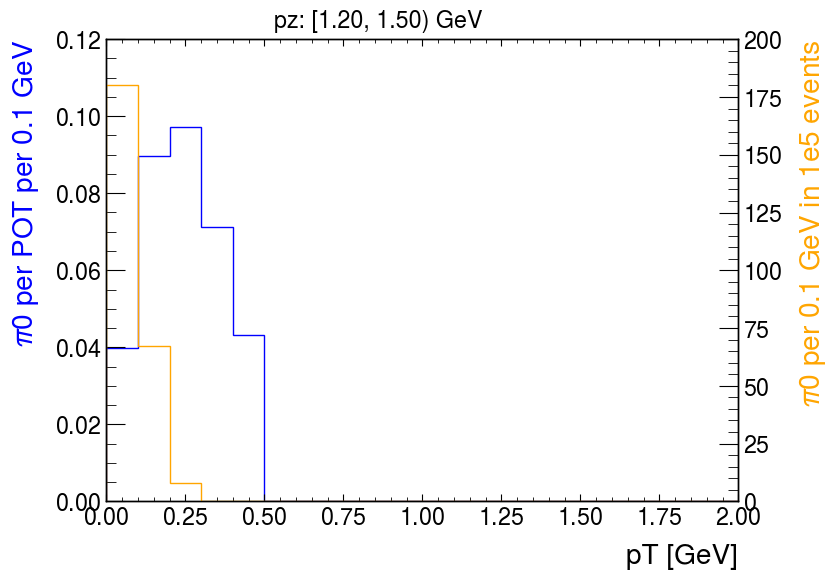

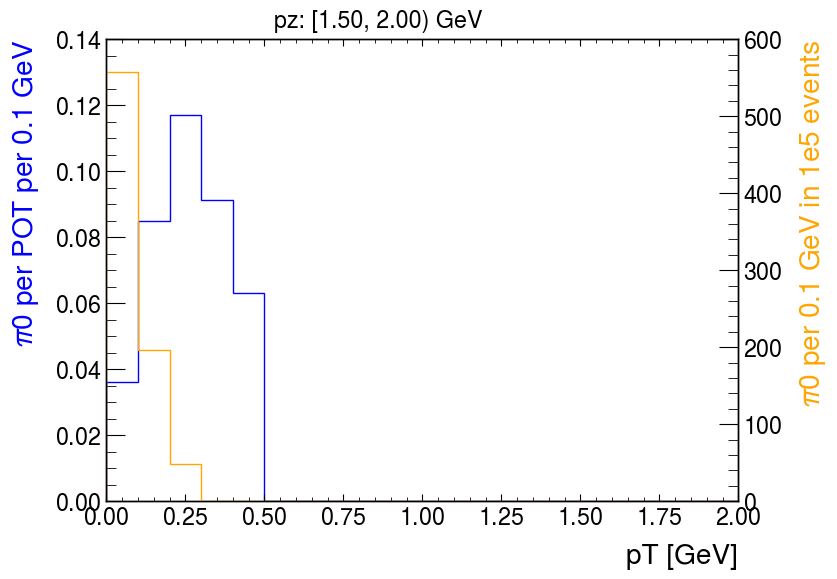

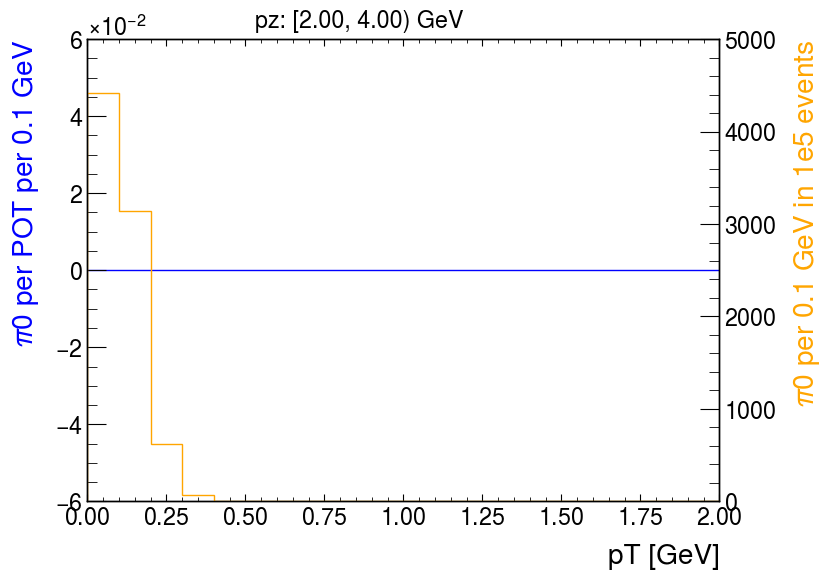

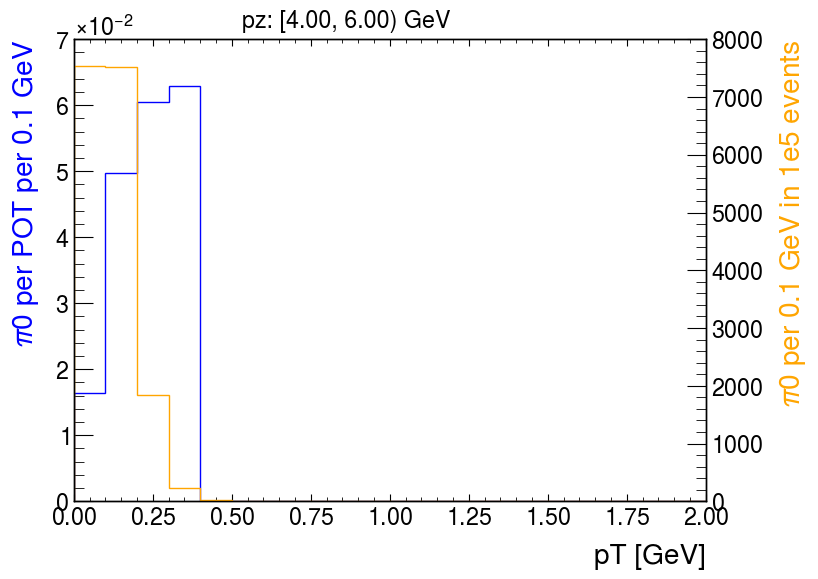

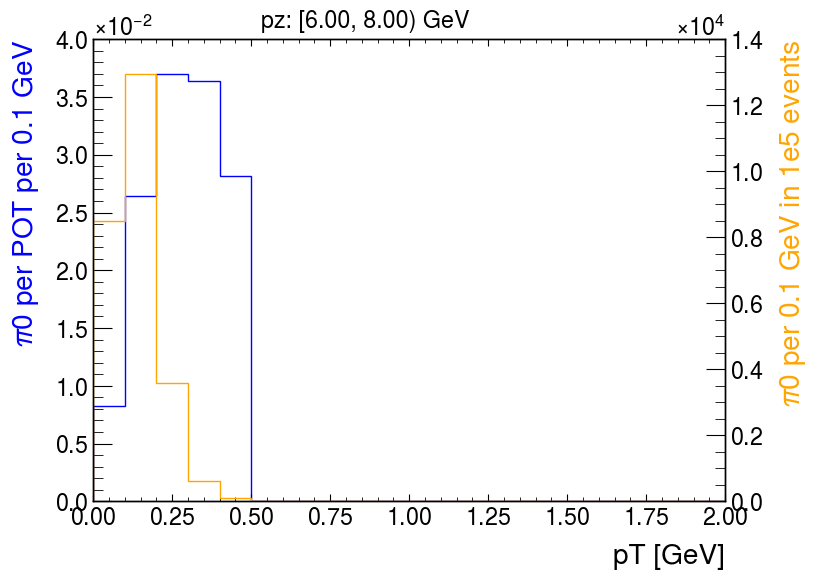

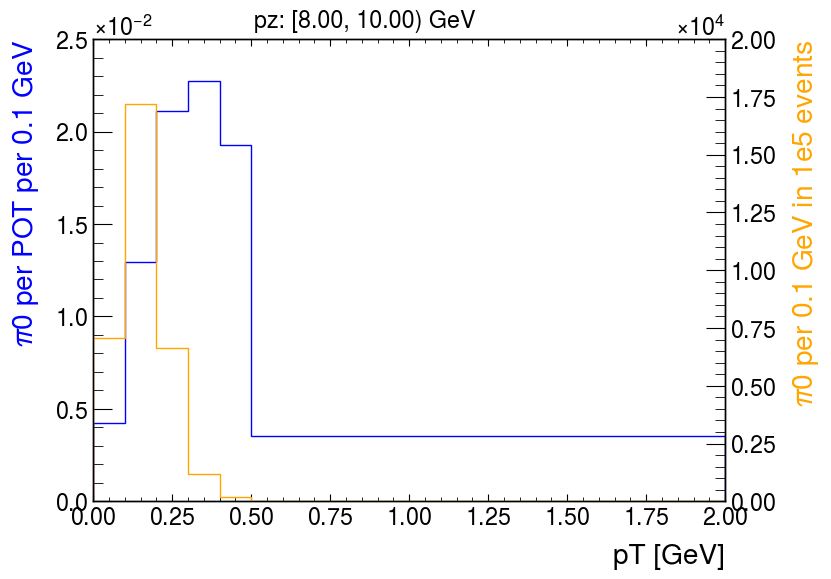

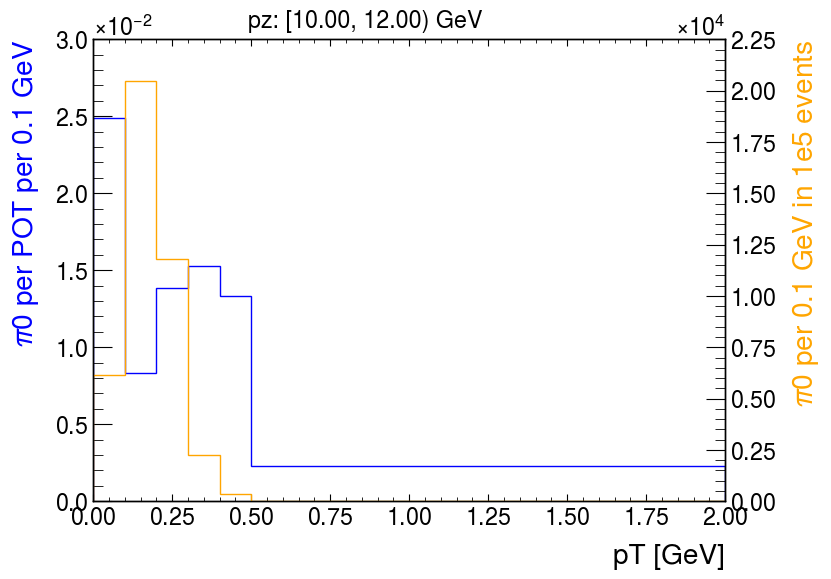

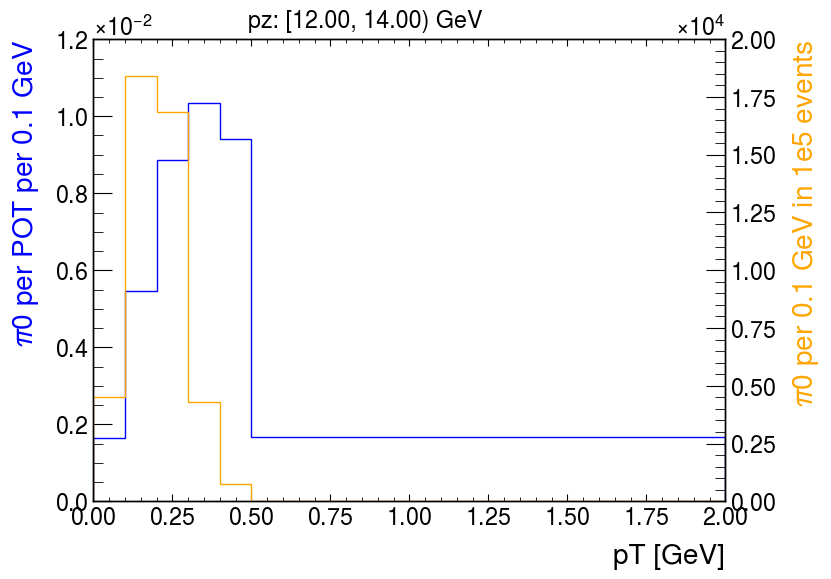

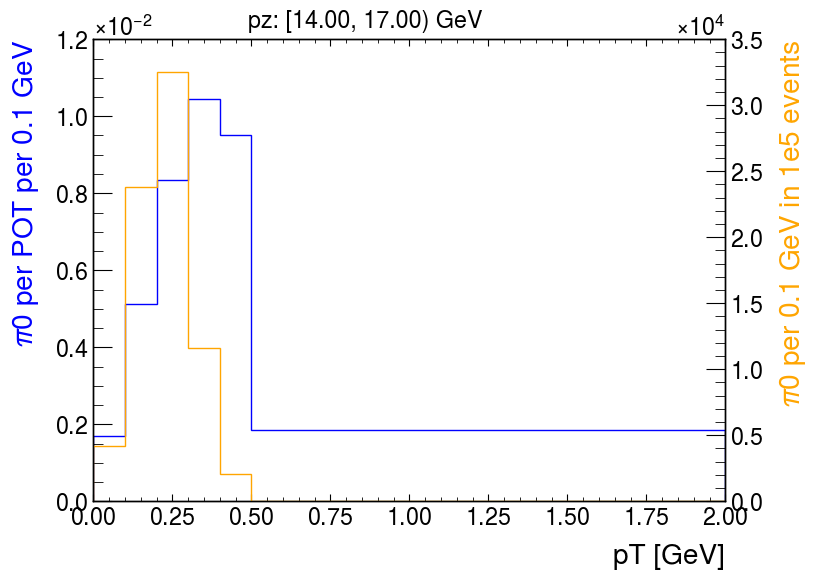

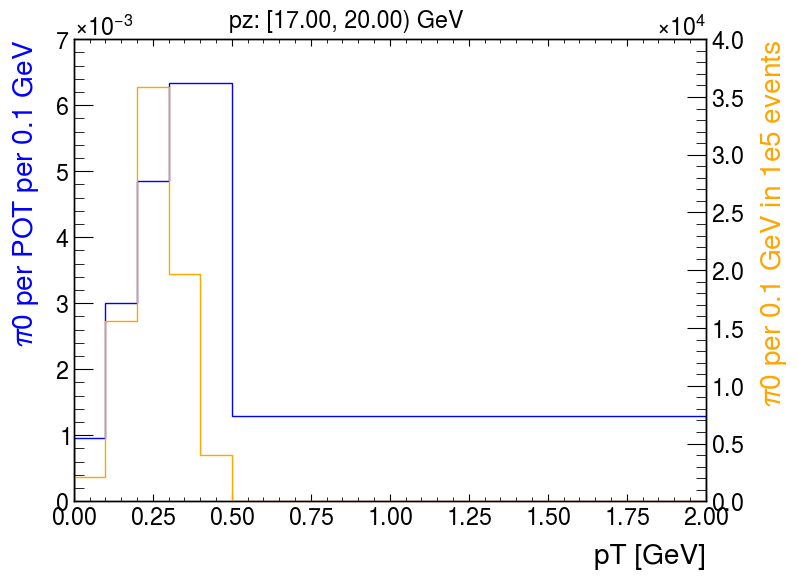

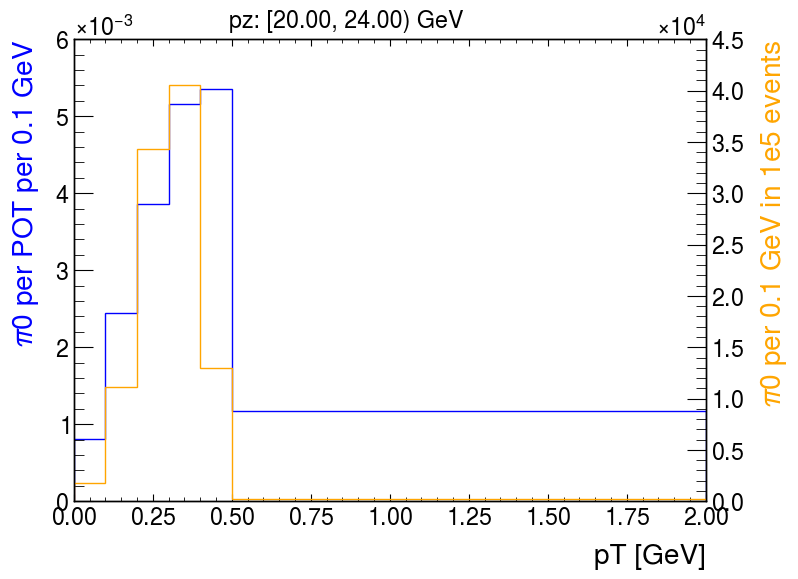

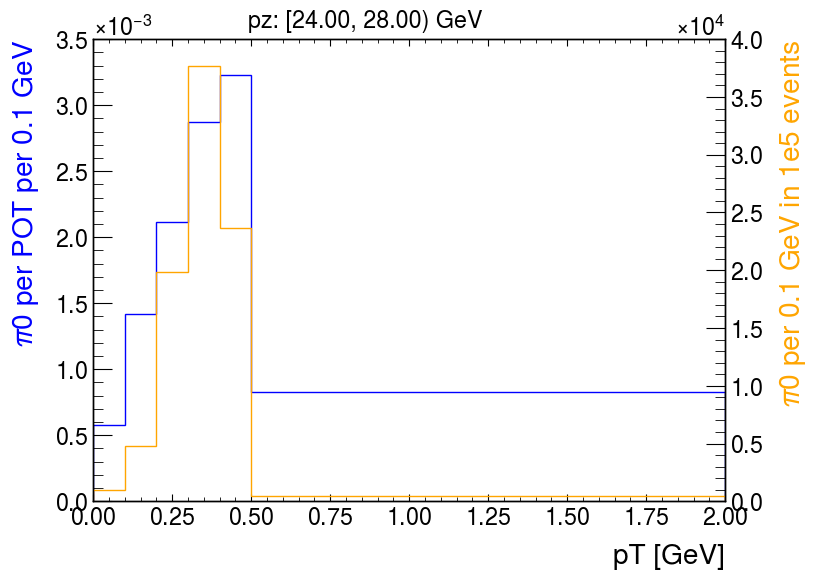

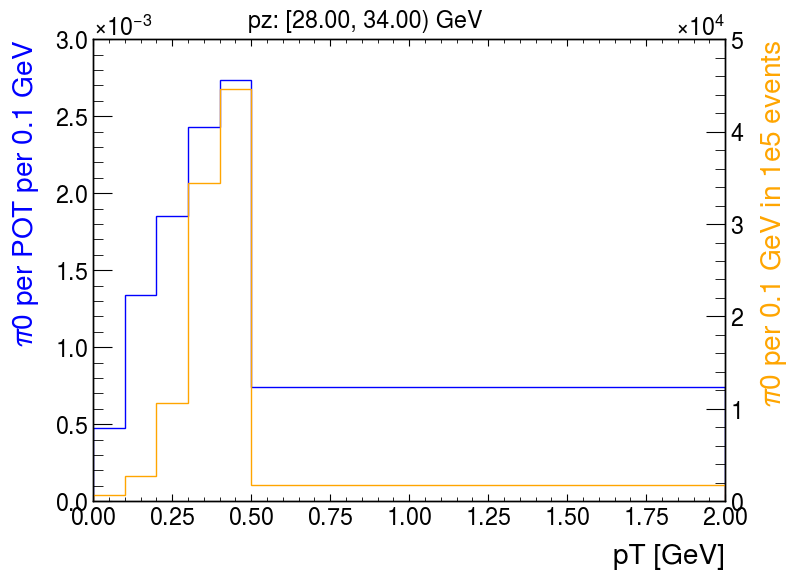

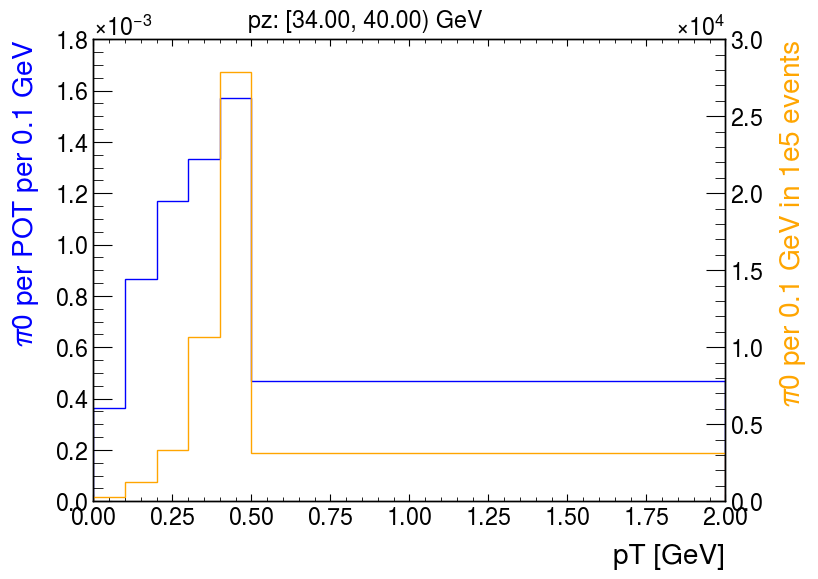

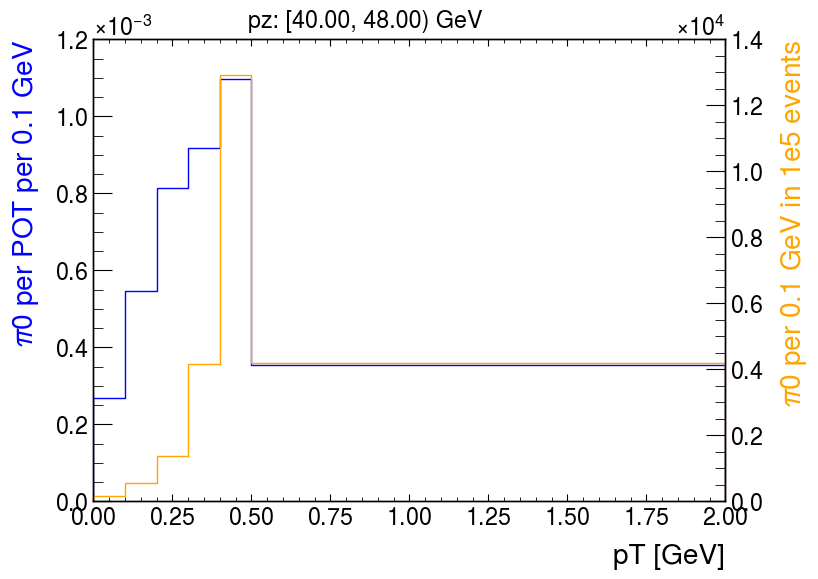

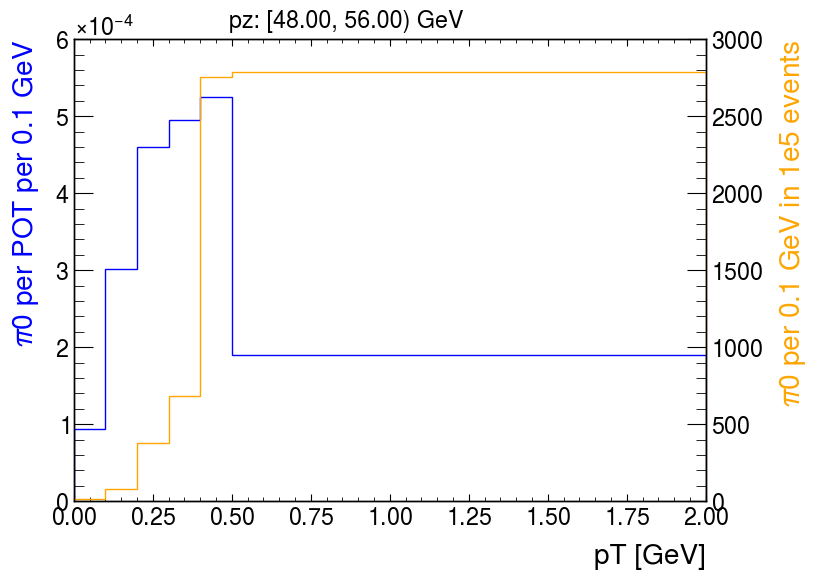

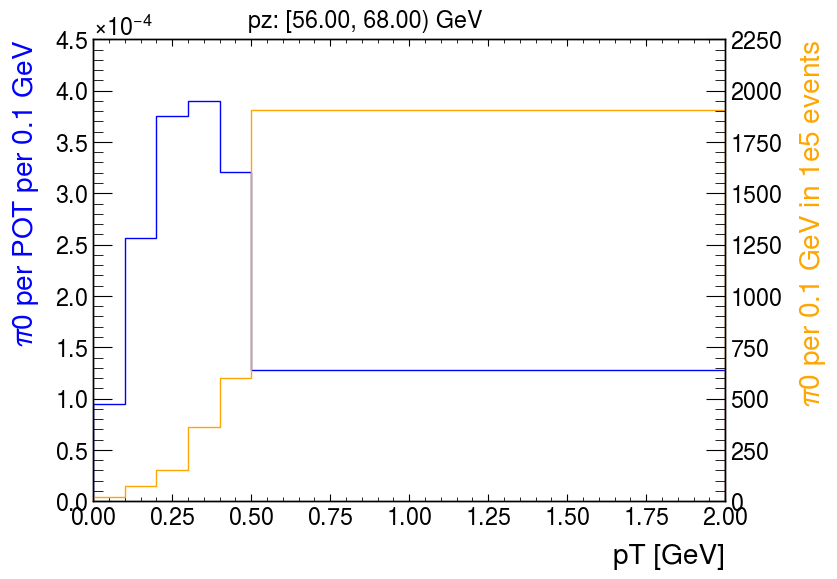

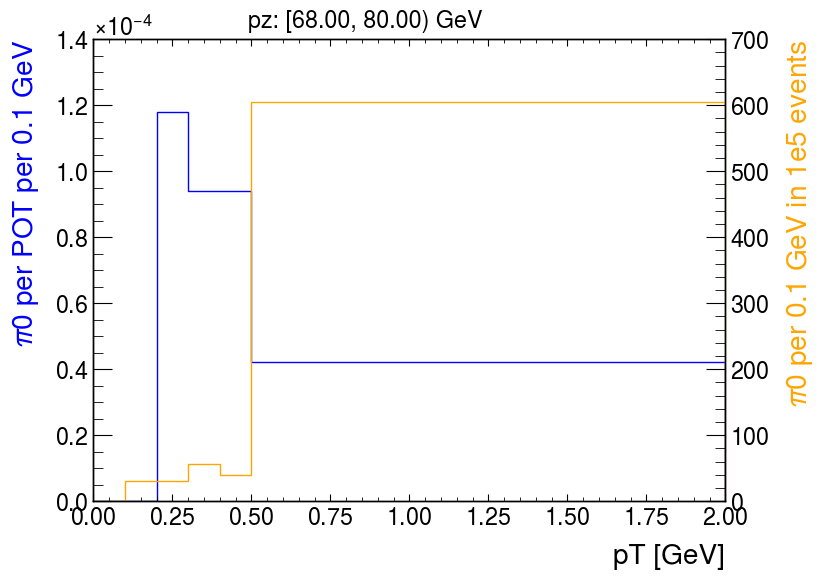

In [16]:
pz_range = ['[0.30, 0.50) GeV', '[0.50, 0.62) GeV', '[0.62, 0.75) GeV', '[0.75, 0.88) GeV', '[0.88, 1.00) GeV',
            '[1.00, 1.20) GeV', '[1.20, 1.50) GeV', '[1.50, 2.00) GeV', '[2.00, 4.00) GeV', '[4.00, 6.00) GeV',
            '[6.00, 8.00) GeV', '[8.00, 10.00) GeV', '[10.00, 12.00) GeV', '[12.00, 14.00) GeV', '[14.00, 17.00) GeV',
            '[17.00, 20.00) GeV', '[20.00, 24.00) GeV', '[24.00, 28.00) GeV', '[28.00, 34.00) GeV', '[34.00, 40.00) GeV',
            '[40.00, 48.00) GeV', '[48.00, 56.00) GeV', '[56.00, 68.00) GeV', '[68.00, 80.00) GeV']

for i in range(len(MIPP_AVG)):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    hist1 = ax1.hist(binvals(bins_pT), bins=bins_pT, weights=normalize(MIPP_AVG[i], bins_pT),histtype='step', label='MIPP data',color='blue')
    hist2 = ax2.hist(binvals(bins_pT), bins=bins_pT, weights=normalize(bdnmc_hist[i], bins_pT),histtype='step', label='BdNMC',color='orange')
    #ax1.legend()
    ax1.set_xlabel('pT [GeV]')
    ax1.set_ylabel('$\pi$0 per POT per 0.1 GeV', color='blue')
    ax2.set_ylabel('$\pi$0 per 0.1 GeV in 1e5 events', color='orange')
    fig.suptitle('pz: ' + pz_range[i])
    fig.show()

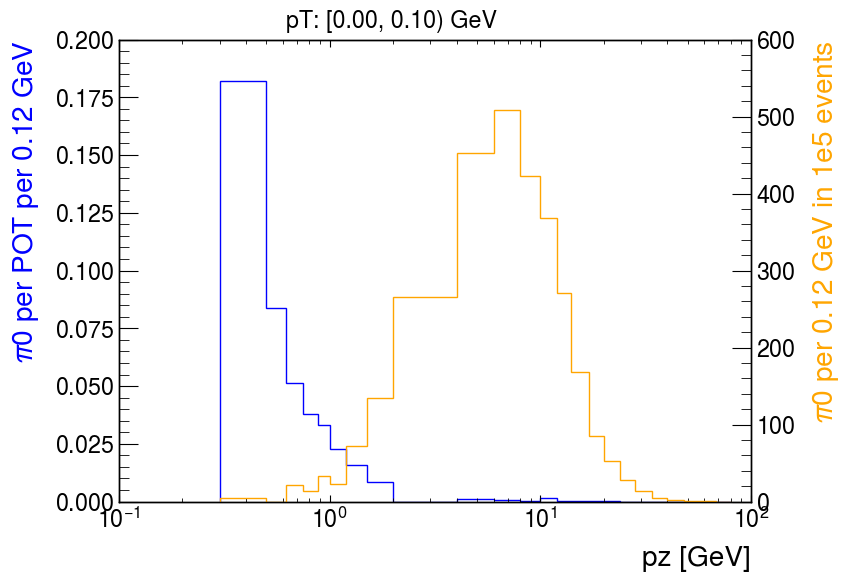

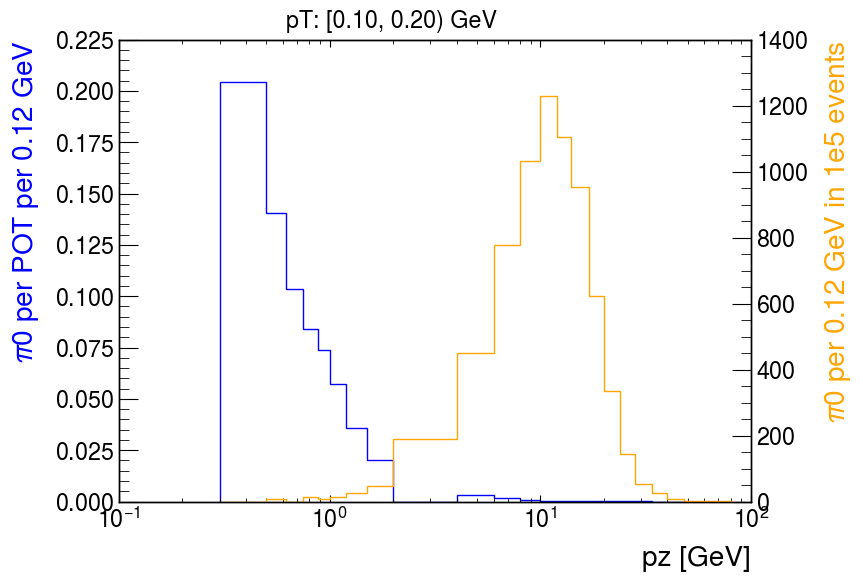

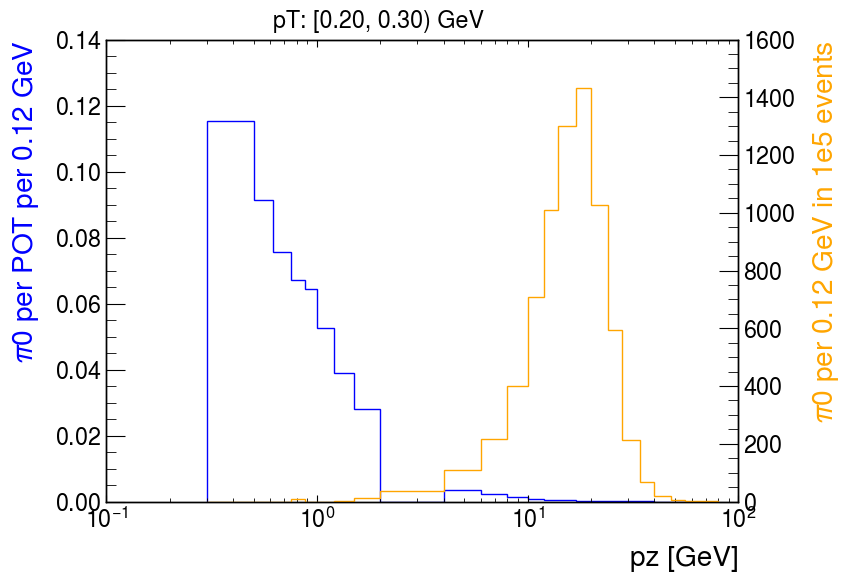

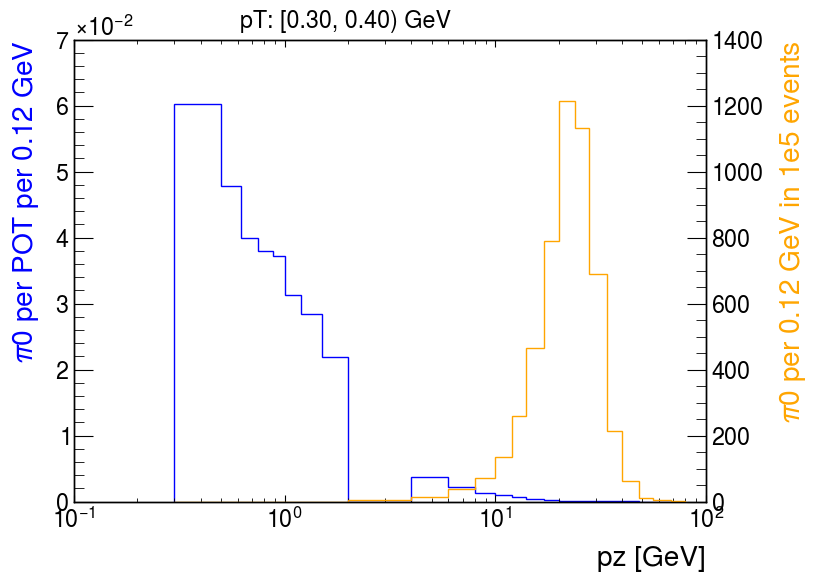

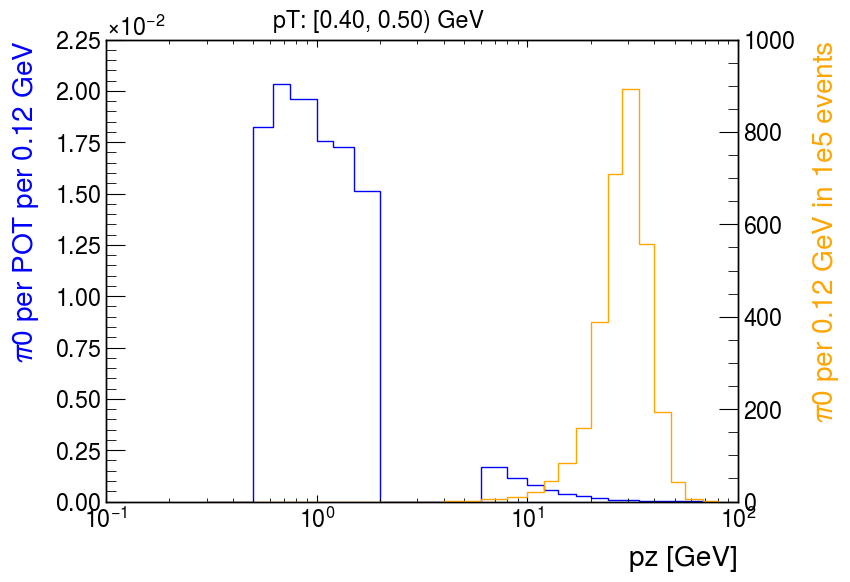

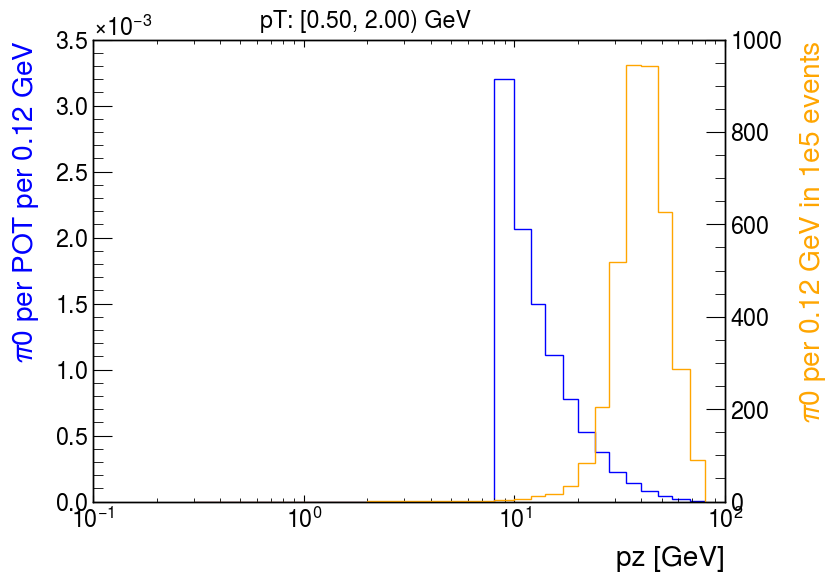

In [17]:
pT_range = ['[0.00, 0.10) GeV', '[0.10, 0.20) GeV', '[0.20, 0.30) GeV', '[0.30, 0.40) GeV', '[0.40, 0.50) GeV', '[0.50, 2.00) GeV']

for i in range(len(MIPP_AVG.T)):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.hist(binvals(bins_pz), bins=bins_pz, weights=normalize(MIPP_AVG.T[i], bins_pz),histtype='step', label='MIPP data',color='blue')
    ax2.hist(binvals(bins_pz), bins=bins_pz, weights=normalize(bdnmc_hist.T[i], bins_pz),histtype='step', label='BdNMC',color='orange')
    ax1.set_xscale('log')
    ax1.set_xlabel('pz [GeV]')
    ax1.set_ylabel('$\pi$0 per POT per 0.12 GeV', color='blue')
    ax2.set_ylabel('$\pi$0 per 0.12 GeV in 1e5 events',color='orange')
    fig.suptitle('pT: ' + pT_range[i])
    fig.show()